# Mount Rainier
Climbing Dataset.
Check it out here:
https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data

In [79]:
# various python import statements
import pandas
import seaborn
import numpy
import matplotlib.pyplot as pyplot

In [80]:
# grabbing data
climb_path = '../data/climbing_statistics.csv'
weather_path = '../data/rainier_weather.csv'

climb = pandas.read_csv(climb_path)
weather = pandas.read_csv(weather_path)

## Describe Data

In [81]:
def describe_data(dataframe):
	'''
	simply describes a dataset nicely by using
	various methods and print statements.
	'''
	print(
		'\n====================' \
		'\nDISPLAY HEAD OF DATA' \
		'\n====================' \
	)
	display(dataframe.head())
	print(
		'\n=====================' \
		'\nDISPLAY SHAPE OF DATA' \
		'\n=====================' \
	)
	print(dataframe.shape)
	print(
		'\n------------------' \
		'\nalso, take note of' \
		'\n duplicate dates! ' \
		'\n------------------' \
	)
	print(
		'(' \
		f'{dataframe["Date"].drop_duplicates().count()}' \
		', 7)' \
	)
	print(
		'\n=====================' \
		'\nDISPLAY TYPES OF DATA' \
		'\n=====================' \
	)
	dataframe.info()
	print(
		'\n===================' \
		'\nMISSING DATA COUNTS' \
		'\n===================' \
	)
	print(dataframe.isnull().sum())

In [82]:
describe_data(weather)


DISPLAY HEAD OF DATA


,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708



DISPLAY SHAPE OF DATA
(464, 7)

------------------
also, take note of
 duplicate dates! 
------------------
(464, 7)

DISPLAY TYPES OF DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Date                     464 non-null object
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB

MISSING DATA COUNTS
Date                     0
Battery Voltage AVG      0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind Direction AVG       0
Solare Radiation AVG     0
dtype: int64


In [83]:
describe_data(climb)


DISPLAY HEAD OF DATA


,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0



DISPLAY SHAPE OF DATA
(4077, 5)

------------------
also, take note of
 duplicate dates! 
------------------
(391, 7)

DISPLAY TYPES OF DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
Date                  4077 non-null object
Route                 4077 non-null object
Attempted             4077 non-null int64
Succeeded             4077 non-null int64
Success Percentage    4077 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 159.3+ KB

MISSING DATA COUNTS
Date                  0
Route                 0
Attempted             0
Succeeded             0
Success Percentage    0
dtype: int64


Something important to notice is that the number of "attempted" people and "succeeded" people are not grouped together.
8 "attempted" can be made with a group of 4 people, a group of 2 people, and two groups of 1 person.
The data is not explicit, although it would have been interesting to know if larger or smaller groups had higher success rates overall.

---

## Clean Data

In [84]:
# dates should be kept as a date object
weather['Date'] = pandas.to_datetime(weather['Date'])
climb['Date'] = pandas.to_datetime(climb['Date'])

# this doesn't seem necessary
# weather = weather.drop(['Battery Voltage AVG'], 1)
climb = climb.drop(['Success Percentage'], 1)
# recalculate columns
climb['Success Rate'] = climb['Succeeded']/climb['Attempted']

In [85]:
# we need to join the weather data with the climbing data
# we want to put the weather for the respective dates within the climbing data
# weather data without any attempts can be deleted or kept aside
data = pandas.merge(climb, weather, how="left", on=["Date"])

In [86]:
display(data.head())

,Date,Route,Attempted,Succeeded,Success Rate,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,Disappointment Cleaver,3,0,0.0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,Disappointment Cleaver,2,0,0.0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,Little Tahoma,8,0,0.0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,Disappointment Cleaver,2,0,0.0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292


In [87]:
del weather
del climb

Something else to consider:
certain dates have multiple entries.
A group of five might check out Disappointment Cleaver, while a group of three might check out Little Tahoma.
If these entries do *not* represent associated groups of people, then they should be merged into one single day.

---

## Normalize Data

## Correlation Heatmap

In [88]:
# == NOTE ==
# sample code used from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

def heatmap(data):
	# set up grid style
	seaborn.set(style='white')

	# compute the correlation matrix
	correlation = data.corr().abs()

	# generate a mask for the upper triangle
	mask = numpy.zeros_like(correlation, dtype=numpy.bool)
	mask[numpy.triu_indices_from(mask)] = True

	# set up the matplotlib figure
	pyplot.subplots(figsize=(12, 8))

	# generate a custom diverging colormap
	cmap = seaborn.cubehelix_palette(light=1, as_cmap=True)

	# draw the heatmap with the mask and correct aspect ratio
	seaborn.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=0, square=True)

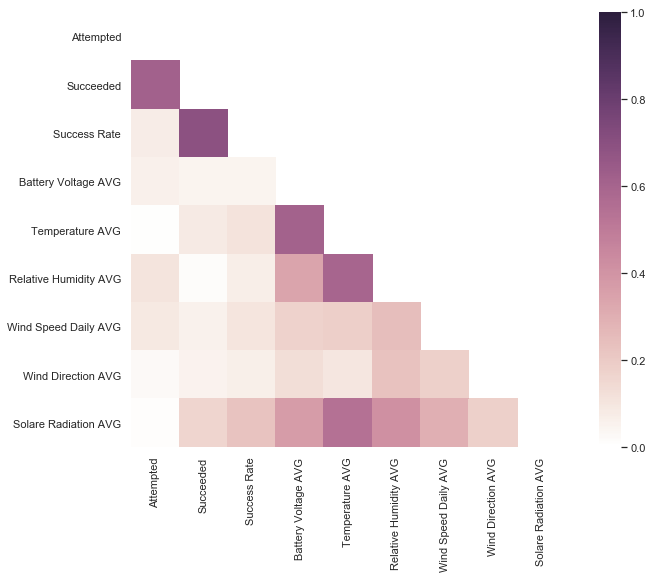

In [89]:
heatmap(data)

Some of the data seems redundent, or highly coorelated.
For example, we really do not need to know the number of people who succeeded, nor do we need to know the number of people who attempted.
What really matters is the success rate.

In [90]:
data = data.drop([
	'Attempted',
	'Succeeded',
	'Battery Voltage AVG'
], 1)

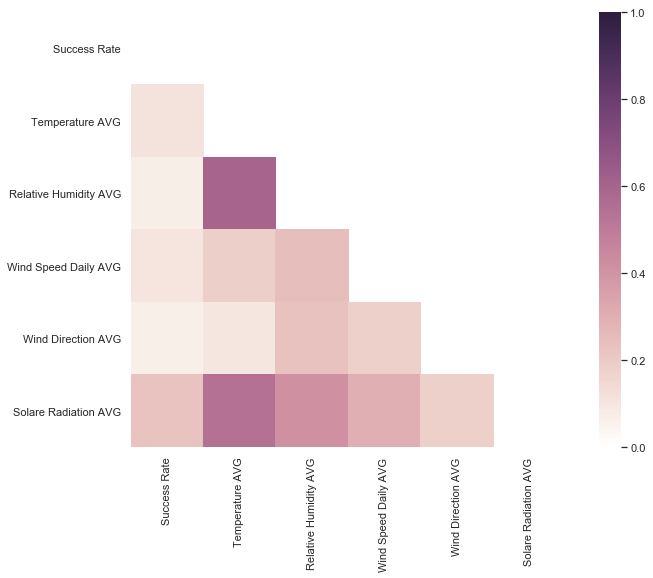

In [91]:
heatmap(data)

Something strange that I personally have noticed is that there is not a specific way in this data to determine whether it was raining/snowing on a particular day.
One would think this is a particularly important factor when considering the weather in any particular study.

Perhaps this was not an oversight.
Perhaps it never or always rains on mount rainier.
It is something to look into in the future, when I revisit this dataset.

---